In [17]:
from skimage import io, color
from numpy import *
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from numpy.random import default_rng

[(47.55714382490811, 58.05193546398847), (98.55122386872141, 58.511682062850035), (60.808812276310306, 90.28992937282533), (82.540202672294, 24.66486609279763), (35.77068639682127, 81.10484258775136), (63.26618242671267, 48.42293642541831), (95.56036273031278, 33.60646055036517), (27.833150161073704, 25.33133337744855), (87.65085169731907, 3.421483403727965), (8.240304173024205, 31.040091819026117), (86.63627573023317, 24.080906691867256), (89.10311221046257, 13.157224317320004), (34.55631375973357, 3.770515831967569), (24.016429844386067, 28.543851227765327), (90.17820676742542, 30.77951487333781), (7.567302062655568, 41.35647290421215), (76.12812405242315, 32.96830058429857), (21.9498429510113, 36.38840211389843), (61.520155528932804, 59.19660060032097), (73.95387790497122, 78.05969674936098), (28.63145855798187, 7.259913662721407), (20.274105403350518, 23.30800805168455), (33.413395071571905, 94.19557755587005), (29.098804033998647, 33.21363412640059), (69.53845402255098, 61.5292765

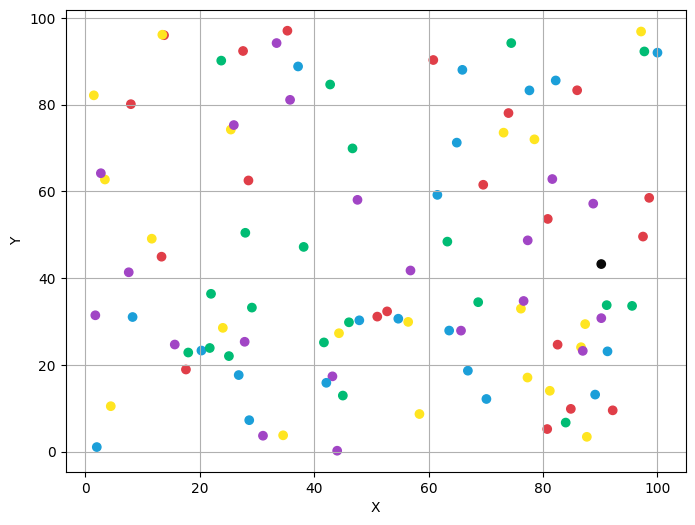

In [34]:
#Largest distance (saturated)
def clamp(x):
  return max(0, min(x, 255))

#info from second answer here: https://stackoverflow.com/questions/14784365/python-convert-colorsys-rgb-coordinates-to-hex
def toIntRGB(x):
  res = int(x * 256)
  if res == 256:
    res = res - 1
  return res

#convert rgb to hex
def toHex(rgb):
  return "#{0:02x}{1:02x}{2:02x}".format(clamp(toIntRGB(rgb[0])), clamp(toIntRGB(rgb[1])), clamp(toIntRGB(rgb[2])))

#colors from Berkley Color Project
#red
SRrgb = color.lab2rgb([51.57, 62.23, 32.20])
SR = toHex(SRrgb)
LRrgb = color.lab2rgb([71.60, 31.58, 16.68])
LR = toHex(LRrgb)
MRrgb = color.lab2rgb([51.57, 33.58, 16.98])
MR = toHex(MRrgb)
DRrgb = color.lab2rgb([30.67, 37.02, 16.39])
DR = toHex(DRrgb)

#yellow
SYrgb = color.lab2rgb([91.08, -5.75, 86.68])
SY = toHex(SYrgb)
LYrgb = color.lab2rgb([91.08, -5.46, 47.71])
LY = toHex(LYrgb)
MYrgb = color.lab2rgb([71.60, -3.33, 45.94])
MY = toHex(MYrgb)
DYrgb = color.lab2rgb([46.83, -.93, 43.35])
DY = toHex(DYrgb)

#blue
SBrgb = color.lab2rgb([61.7, -13.21, -38.40])
SB = toHex(SBrgb)
LBrgb = color.lab2rgb([76.73, -8.87, -20.82])
LB = toHex(LBrgb)
MBrgb = color.lab2rgb([56.99, -7.86, -21.41])
MB = toHex(MBrgb)
DBrgb = color.lab2rgb([36.51, -6.56, -23.73])
DB = toHex(DBrgb)

#green
SGrgb = color.lab2rgb([66.94, -59.95, 24.54])
SG = toHex(SGrgb)
LGrgb = color.lab2rgb([79.09, -34.13, 15.21])
LG = toHex(LGrgb)
MGrgb = color.lab2rgb([61.70, -33.27, 14.07])
MG = toHex(MGrgb)
DGrgb = color.lab2rgb([38.96, -33.29, 12.41])
DG = toHex(DGrgb)

#purple
SPrgb = color.lab2rgb([46.83, 57.21, -50.49])
SP = toHex(SPrgb)
LPrgb = color.lab2rgb([71.60, 26.03, -27.87])
LP = toHex(LPrgb)
MPrgb = color.lab2rgb([51.57, 28.05, -27.82])
MP = toHex(MPrgb)
DPrgb = color.lab2rgb([30.76, 33.04, -29.66])
DP = toHex(DPrgb)

#black (target)
BKrgb = color.lab2rgb([2.34, -0, -.07])
BK = toHex(BKrgb)

def generate_random_points(num_points):
    points = []
    while len(points) < num_points:
        x = np.random.uniform(0, 100)
        y = np.random.uniform(0, 100)
        if all(np.sqrt((x - p[0])**2 + (y - p[1])**2) >= 3 for p in points):
            points.append((x, y))
    return points

def set_color(df_arr, color_i, color):
    for i in color_i:
      df_arr.at[i, 'Color'] = color
    return df_arr

def save_to_csv(points, filename, red_index, yellow_index, blue_index, green_index, purple_index, red, yellow, blue, green, purple):
    df = pd.DataFrame(points, columns=['x', 'y'])
    df['Color'] = BK  # Set color to black for the target point


    #Set arrays of size 25 of random values to red, yellow or blue
    df = set_color(df, red_index, red)
    df = set_color(df, yellow_index, yellow)
    df = set_color(df, blue_index, blue)
    df = set_color(df, green_index, green)
    df = set_color(df, purple_index, purple)

    #non-randomized option in case it makes it more uniform
    #df.at[i, 'color'] = SR  # Set default color to black
    ###
    #for i, point in enumerate(points):
    #  mod = i % 3
    #  if mod == 0:
    #    df.at[i, 'color'] = SR  # Set default color to blue
    #  elif mod == 1:
    #    df.at[i, 'color'] = SY
    #  elif mod == 2:
    #    df.at[i, 'color'] = SB
    #
    df.to_csv(filename, index=False)

def plot_points_with_colors(df):
    x_values = df['x']
    y_values = df['y']
    colors = df['Color']
    plt.figure(figsize=(8, 6))
    plt.scatter(x_values, y_values, color=colors)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.grid(True)
    plt.show()

def create_csv_with_colors(red, yellow, blue, green, purple):
    number_points = 101
    points = generate_random_points(101)
    print(points)
    #target_index = np.random.randint(len(points))

    #random array of numbers with no repetition to assign each index of points a color
    rng = default_rng()
    numbers = rng.choice(number_points, size=number_points, replace=False)

    r = numbers[:20]
    y = numbers[20:40]
    b = numbers[40:60]
    g = numbers[60:80]
    p = numbers[80:100]
    save_to_csv(points, 'experiment2_random_points.csv', r, y, b, g, p, red, yellow, blue, green, purple)
    df = pd.read_csv('experiment2_random_points.csv')
    plot_points_with_colors(df)

create_csv_with_colors(SR, SY, SB, SG, SP)

[(90.7232591289642, 18.396969426360222), (35.15974804797083, 52.34290030880351), (2.3393285160548727, 89.23808373617595), (79.24405174089469, 41.26290457874846), (62.63826786096731, 41.534724634919094), (43.17492148025932, 86.08690611440706), (81.69334445564243, 83.12827540356703), (84.60290154595604, 1.1167150726096309), (28.61060369582804, 42.855459752628654), (48.92345876708942, 30.28833865862479), (0.5448526158899347, 11.945711951189086), (78.40729807610104, 24.60273095677078), (70.97325753513103, 88.91317625347878), (87.60955541960027, 61.09730931645474), (96.92817063967041, 85.66997929477064), (44.428276127323294, 42.8633455156688), (32.33499557772079, 66.70584075000389), (5.538041284100148, 71.00824482614881), (28.85597830411425, 59.501848794898), (22.83180261779263, 43.69050284063152), (30.190475791452, 30.759913019060125), (55.30421725198143, 63.75309303796125), (46.28716545954521, 27.340924873489637), (92.78650381555902, 92.93616564481678), (81.35210050477852, 58.768944872850

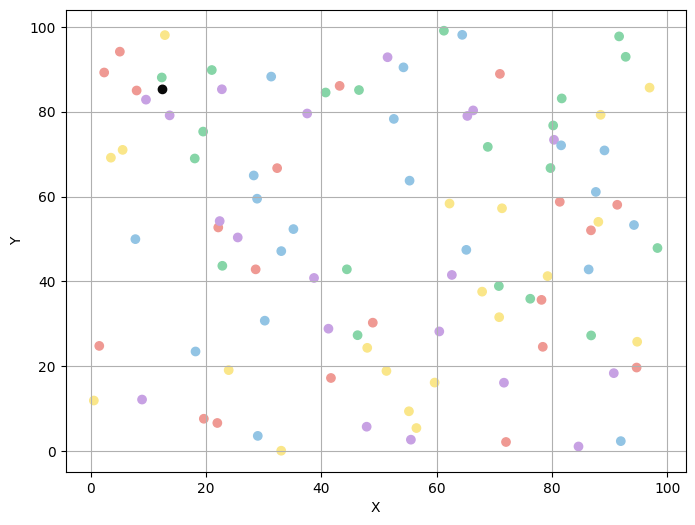

In [35]:
#second farthest distance (Light)
create_csv_with_colors(LR, LY, LB, LG, LP)

[(26.372401826329515, 18.593988255857617), (84.9963712896417, 44.829255439846726), (62.06913908167765, 58.56607991290562), (85.10593697431916, 21.710830193843357), (18.66843411995508, 98.51981003718227), (51.97437567663198, 21.574104803472427), (40.16721514246998, 0.46504829793703184), (34.95946158275653, 77.1007114148648), (63.569327805101096, 40.512795852741576), (81.41192685205111, 75.27248824481005), (55.89453995665622, 14.4790957793391), (27.564921863987934, 26.679024930217043), (33.30571919824198, 23.08285520326674), (73.65575955536124, 75.39623701036344), (2.558444457606479, 30.228837661113296), (24.018945957144766, 3.232144352292221), (33.669603154579974, 22.874063454017126), (59.90084431218485, 61.3679629866539), (91.50620719548317, 65.42333640472135), (4.325999691196913, 45.711101319259676), (59.543645837847635, 88.63689378643245), (29.77285864974687, 38.31523039998951), (24.17321227165844, 70.4434000723731), (18.36173487532321, 4.471228740070243), (8.100655684567526, 97.7935

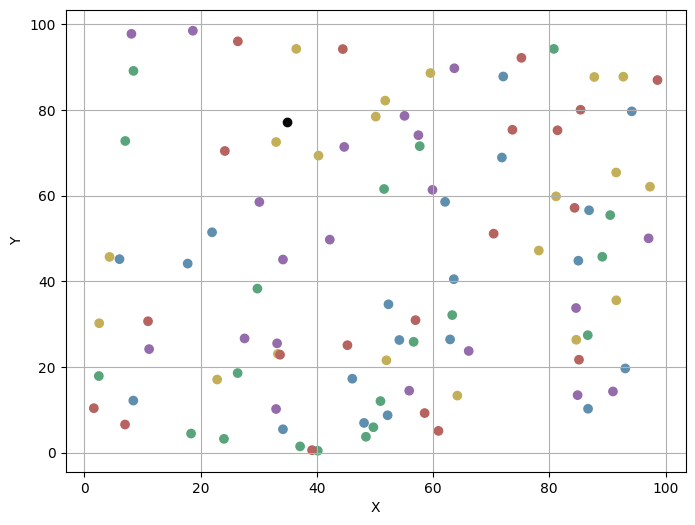

In [36]:
#second closest distance (Muted)
create_csv_with_colors(MR, MY, MB, MG, MP)

[(12.00421103116095, 95.79203828113093), (31.507312460607217, 50.68789208295007), (75.62539320193696, 40.37613570721682), (27.4748344503437, 99.18991591077163), (83.6086097304779, 59.90324657471858), (35.12875495113368, 26.996086421735043), (65.96714985374993, 37.15957122459266), (54.07044582502893, 12.786123510883641), (14.341719754560401, 98.97523914789109), (17.887400772468144, 89.78084839043227), (59.363360450364134, 45.63723675544965), (70.45477997475021, 7.7995082823790085), (72.97549296530065, 16.825282851012446), (3.493761634941539, 8.390216418266084), (20.252782313235084, 71.99929829199266), (59.75431434869274, 6.4957078839716464), (8.39799421751184, 63.966093245857394), (62.55208123120973, 56.79083989958419), (14.931228084919857, 23.45672181243481), (75.98919583219367, 63.221465311271416), (68.57147901507012, 24.61031903777521), (15.970213199107807, 99.32252860869639), (91.28013258589205, 40.22240543626548), (73.29420904517325, 58.918908093209374), (44.61137739505232, 28.2626

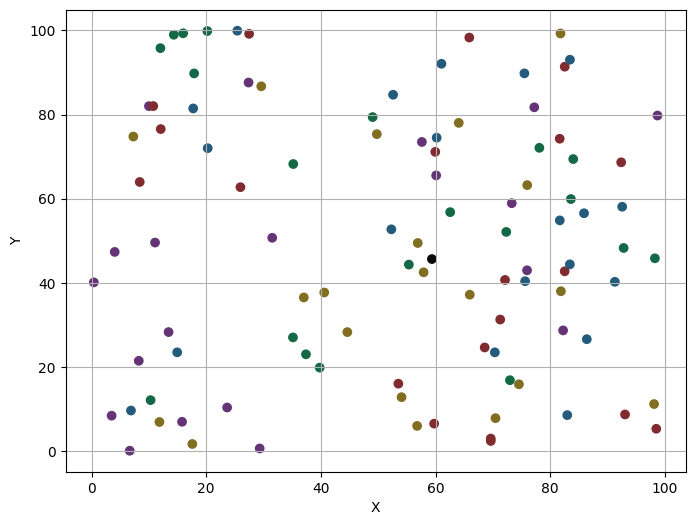

In [37]:
#closest distance (Dark)
create_csv_with_colors(DR, DY, DB, DG, DP)